# Predict Home Selling Price with Gradient Boosted Regression Trees

## This is implementation of Gradient Boosting for regression. It consists of following parts:
### Import libraries; load data; select features and split in train and test sets (no dev set as we use cross-validation)
### Fit model with default hyper-parameters, report R2 score and RMSE on train and test sets, and RMSE_test/RMSE_train as measure of VARIANCE; do Error analysis by plotting R2 for CV and train sets against number of training examples
### Perform CV grid search giving algorithm ranges of important hyper-parameters (this is method-specific but there are some typical params like learning rate); train model with parameters defined by CV grid search; report same performance metrics as in previous step and do error analysis
### Try to optimize further to boost test accuracy and to decrease overfitting (gap between train and test error) by tweaking hyper-parameters and by shrinking feature list

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
#load ML libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
#
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
# read data in
df = pd.read_csv('data/df_52feat.csv', header=0, index_col=0)
df.head(3)

,PicCount,List Price,Sold Price,Tot BR,Tot Baths,TotFlArea,Age,TotalPrkng,# Rms,Fireplaces,...,District 12,District 25,District 4,District 32,District 5,District 23,District 19,District 2,DOM,Address_IsPH
R2050687,-2.302161,-0.861236,-0.914670,-0.657683,-0.807609,-0.862037,-0.520211,-0.127012,-1.111587,1.527118,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
R2050161,-2.643100,-0.344493,-0.385520,0.869434,0.947883,0.213822,-0.287701,-0.127012,0.155713,1.527118,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,1
R2049384,0.766285,-0.038619,0.480363,0.869434,0.947883,0.086644,0.099816,-0.127012,0.155713,1.527118,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0


In [4]:
num_features = ['PicCount', 'Tot BR', 'Tot Baths', 'TotFlArea', 'Age','TotalPrkng', '# Rms',
                'Fireplaces', 'Gross Taxes', 'Taxes/TotFlArea', 'Strata Maint Fee', 'View_Score', 'Baths']
not_features = ['List Price', 'Sold Price', 'DOM']

In [5]:
# define feature matrix and response variable
X = df.drop(not_features, axis=1)
# use numerical features only
#X = df[num_features]
y = df['Sold Price']

In [8]:
# split the dataset into train, dev, test datasets
#X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=229)
#X_train, X_dev, y_train, y_dev = train_test_split(X_tmp, y_tmp, test_size=0.25)

## In the CV set-up we don't need to manually create dev set as it is done by CV iteratively

In [12]:
# split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=229)

In [86]:
# train model with default hyper-parameters
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
#Let's print the R-squared value for train/test. 
#This explains how much of the variance in the data our model is able to decipher. 
print("Gradient Boosting R-squared for train: ", model.score(X_train, y_train))
print("Gradient Boosting R-squared for test: ", model.score(X_test, y_test))
y_pred = model.predict(X_test)
# RMSE on train data
train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Gradient Boosting RMSE for train: %.6e" % train_RMSE)
# RMSE on test data
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting RMSE for test: %.6e" % test_RMSE)
# test/train RMSE ratio
print("test/train RMSE ratio: %.6e" % (test_RMSE/train_RMSE))

Gradient Boosting R-squared for train:  0.9211698187419161
Gradient Boosting R-squared for test:  0.9081397040610433
Gradient Boosting RMSE for train: 2.802442e-01
Gradient Boosting RMSE for test: 3.053246e-01
test/train RMSE ratio: 1.089495e+00


In [87]:
# list 20 most important features
print("Feature Importances")
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)
feat_importance[:20]

Feature Importances


Gross Taxes         0.521688
TotFlArea           0.370344
Age                 0.030214
Baths               0.022377
Strata Maint Fee    0.018438
Taxes/TotFlArea     0.017089
PicCount            0.004130
# Rms               0.003337
TotalPrkng          0.002013
View_Score          0.001917
District 5          0.001908
GST Incl            0.001361
District 21         0.001167
Title to Land 4     0.000638
Tot BR              0.000564
District 16         0.000373
District 18         0.000323
District 27         0.000289
District 10         0.000242
District 4          0.000205
dtype: float64

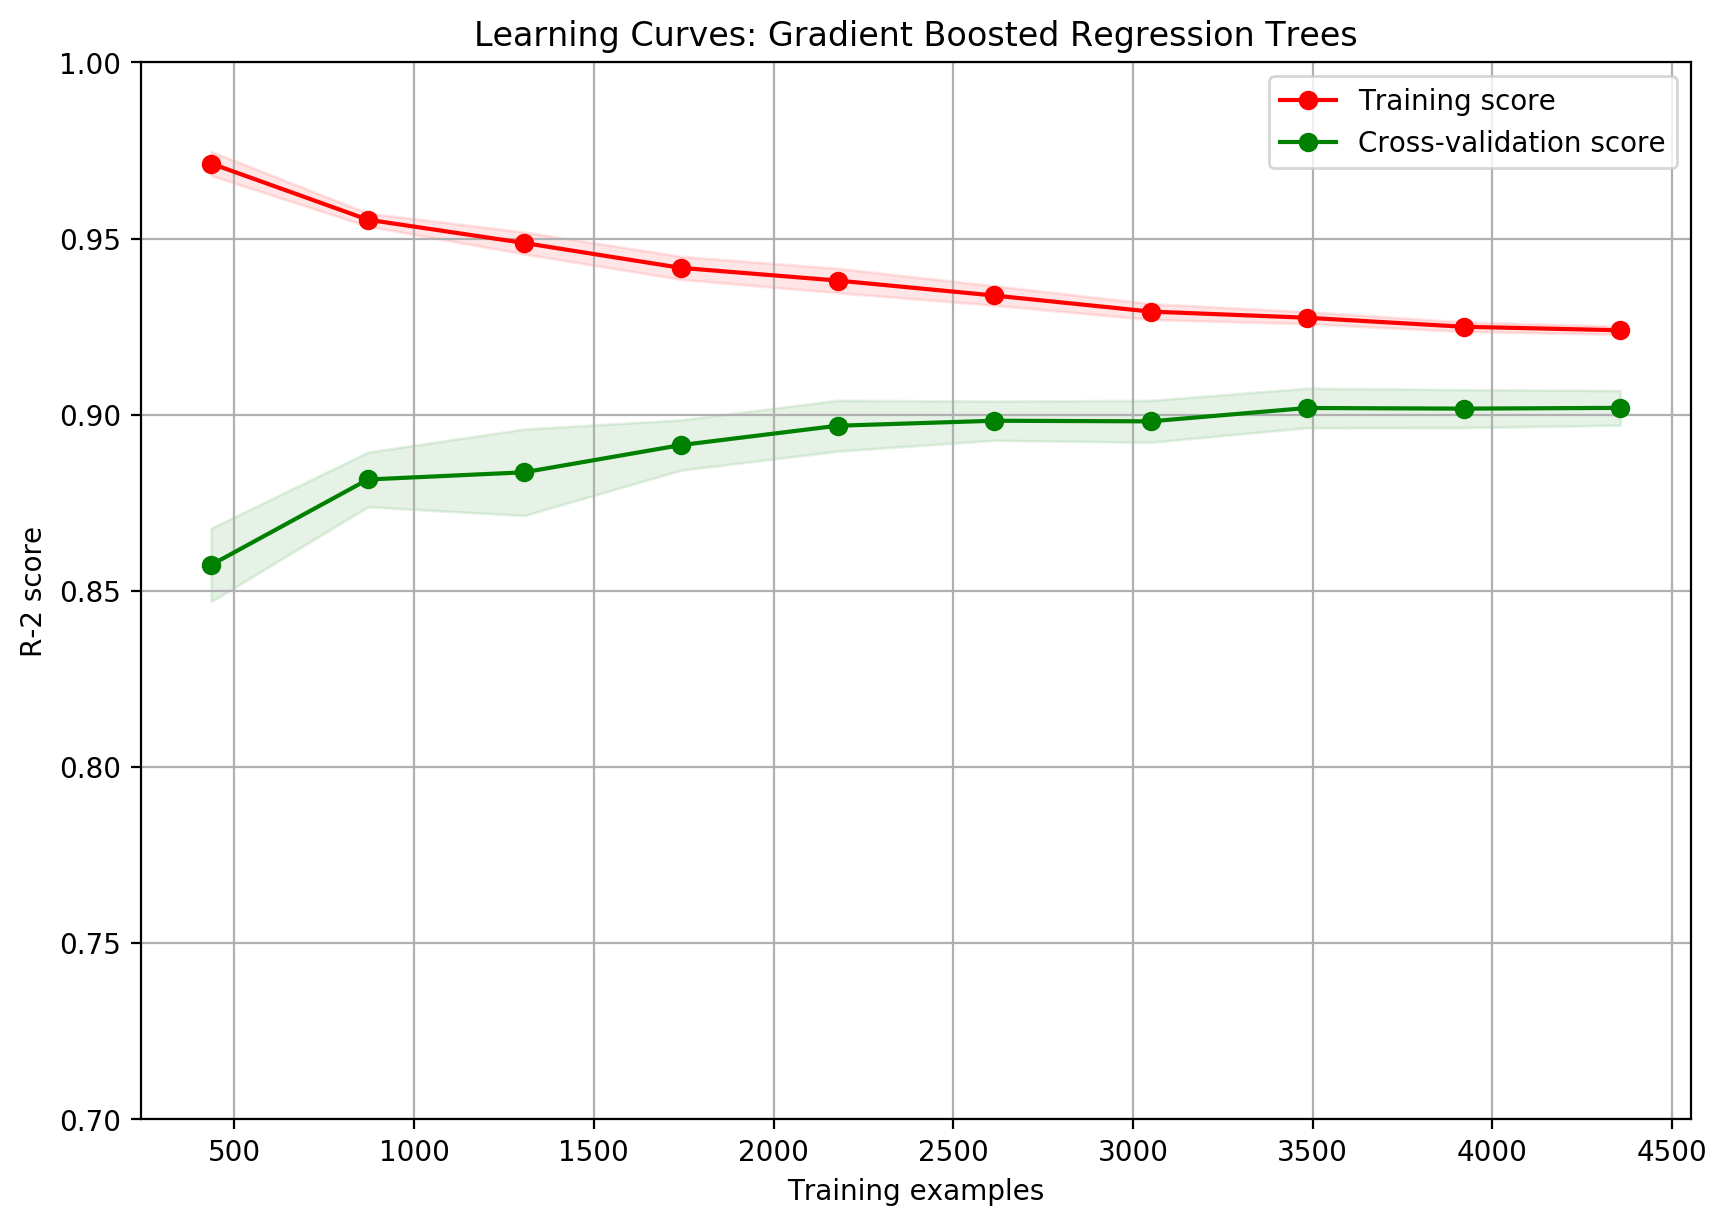

In [66]:
title = "Learning Curves: Gradient Boosted Regression Trees"
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()

## Let's see if we can improve our model further and find optimal hyper-parameters

In [27]:
# grid search for best model parameters
def GradientBooster(param_grid, n_jobs):
    estimator = GradientBoostingRegressor()
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=229)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs)
    classifier.fit(X_train, y_train)
    print("Best Estimator learned through GridSearch")
    print(classifier.best_estimator_)
    return cv, classifier.best_estimator_ 

## WARNING: it might take a while to complete, especially if number of combinations of different values of hyperparameters is high

In [40]:
"""
param_grid={'loss' : ['ls', 'lad'],
            'n_estimators':[50, 100, 200], 
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth':[3, 5, 7, 15], 
            'min_samples_leaf':[3, 5, 10, 15], 
            'max_features':['auto', 'sqrt', 'log2']
           }
"""
param_grid={'loss' : ['ls'],
            'n_estimators':[100, 200], 
            'learning_rate': [0.1, 0.05, 0.01],
            'max_depth':[7, 15, 20], 
            'min_samples_leaf':[3, 5, 10], 
            'max_features':['auto', 'log2']
           }
n_jobs=4

#Let's fit model to the training dataset by calling the function we just created.
cv, best_est = GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=20,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [44]:
# the best estimator parameters:
print( "Best Estimator Parameters")
print("---------------------------")
print("n_estimators: %d" % (best_est.n_estimators))
print("learning_rate: %.2f" % (best_est.learning_rate))
print("max_depth: %d" % (best_est.max_depth))
print("min_samples_leaf: %d" % (best_est.min_samples_leaf))
print("max_features: %s" % (best_est.max_features))
print()
print("Train R-squared: %.6f" % (best_est.score(X_train,y_train)))

Best Estimator Parameters
---------------------------
n_estimators: 200
learning_rate: 0.05
max_depth: 20
min_samples_leaf: 10
max_features: log2

Train R-squared: 0.977470


In [45]:
# train model with best parameters
model = GradientBoostingRegressor(n_estimators=best_est.n_estimators, max_depth=best_est.max_depth,
                                  learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf,
                                  max_features=best_est.max_features)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=20,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [55]:
# list 20 most important features
print("Feature Importances")
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)
feat_importance[:20]

Feature Importances


Gross Taxes         0.282868
TotFlArea           0.185473
Strata Maint Fee    0.111222
Tot BR              0.085213
Tot Baths           0.076798
Taxes/TotFlArea     0.055269
Baths               0.044435
TotalPrkng          0.036388
Age                 0.028882
# Rms               0.021505
View_Score          0.020035
PicCount            0.010657
Fireplaces          0.009583
GST Incl            0.004450
Title to Land 4     0.003096
District 4          0.002892
District 21         0.002783
District 15         0.001954
District 5          0.001835
Title to Land 3     0.001637
dtype: float64

In [56]:
#Let's print the R-squared value for train/test. 
#This explains how much of the variance in the data our model is able to decipher. 
print("Gradient Boosting R-squared for train: ", model.score(X_train, y_train))
print("Gradient Boosting R-squared for test: ", model.score(X_test, y_test))
y_pred = model.predict(X_test)
# RMSE on train data
train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Gradient Boosting RMSE for train: %.6e" % train_RMSE)
# RMSE on test data
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting RMSE for test: %.6e" % test_RMSE)
# test/train RMSE ratio
print("test/train RMSE ratio: %.6e" % (test_RMSE/train_RMSE))

Gradient Boosting R-squared for train:  0.9781441563079861
Gradient Boosting R-squared for test:  0.9123232513353805
Gradient Boosting RMSE for train: 1.475619e-01
Gradient Boosting RMSE for test: 2.982909e-01
test/train RMSE ratio: 2.021463e+00


In [61]:
def plot_learning_curve(estimator, title, X, y, ylim=[0.7, 1], cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("R-2 score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

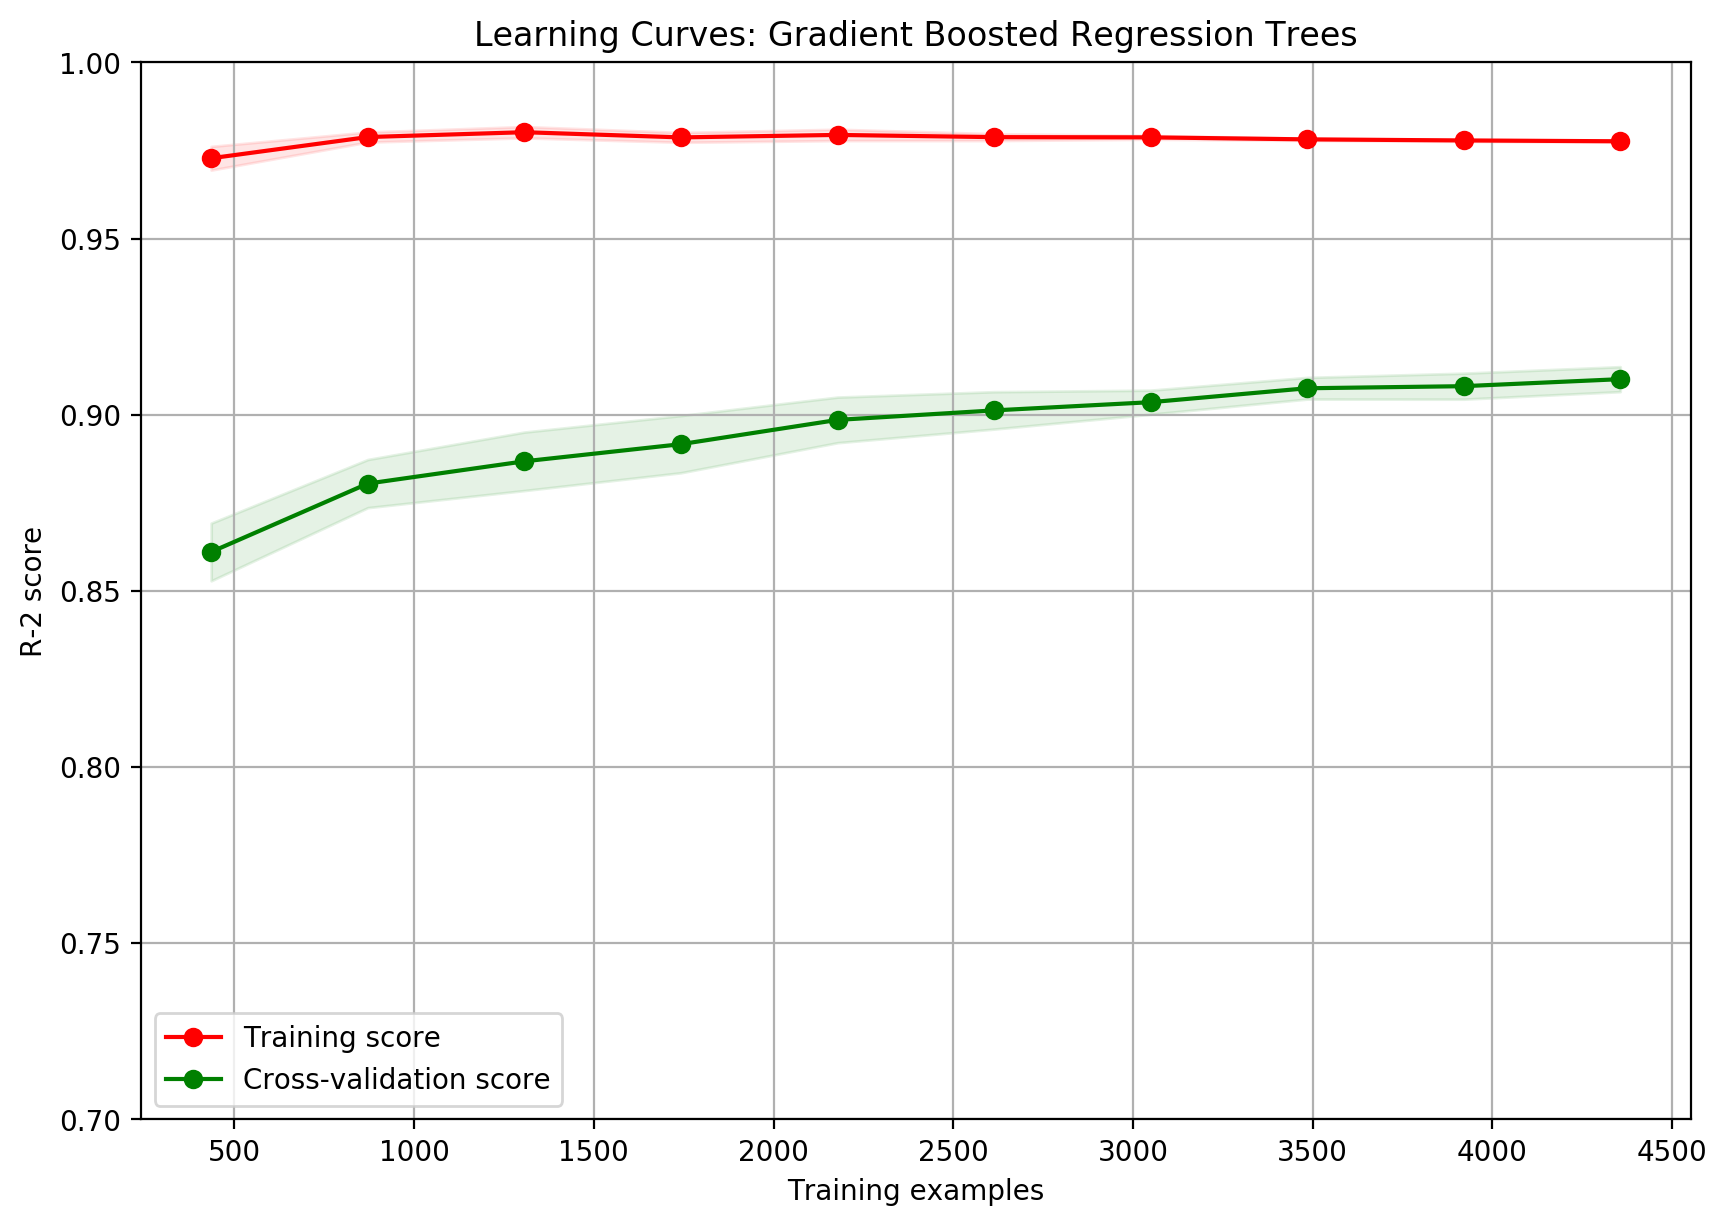

In [62]:
title = "Learning Curves: Gradient Boosted Regression Trees"
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()

## Let's see if we can decrease overfitting by tweaking some parameters

In [92]:
# set n_estimators to default and max_depth to 10
model = GradientBoostingRegressor(n_estimators=100, max_depth=10,
                                  learning_rate=best_est.learning_rate, min_samples_leaf=best_est.min_samples_leaf,
                                  max_features=best_est.max_features)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=10,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [93]:
#Let's print the R-squared value for train/test. 
#This explains how much of the variance in the data our model is able to decipher. 
print("Gradient Boosting R-squared for train: ", model.score(X_train, y_train))
print("Gradient Boosting R-squared for test: ", model.score(X_test, y_test))
y_pred = model.predict(X_test)
# RMSE on train data
train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Gradient Boosting RMSE for train: %.6e" % train_RMSE)
# RMSE on test data
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting RMSE for test: %.6e" % test_RMSE)
# test/train RMSE ratio
print("test/train RMSE ratio: %.6e" % (test_RMSE/train_RMSE))

Gradient Boosting R-squared for train:  0.9466469930310184
Gradient Boosting R-squared for test:  0.9112464951874035
Gradient Boosting RMSE for train: 2.305525e-01
Gradient Boosting RMSE for test: 3.001170e-01
test/train RMSE ratio: 1.301730e+00


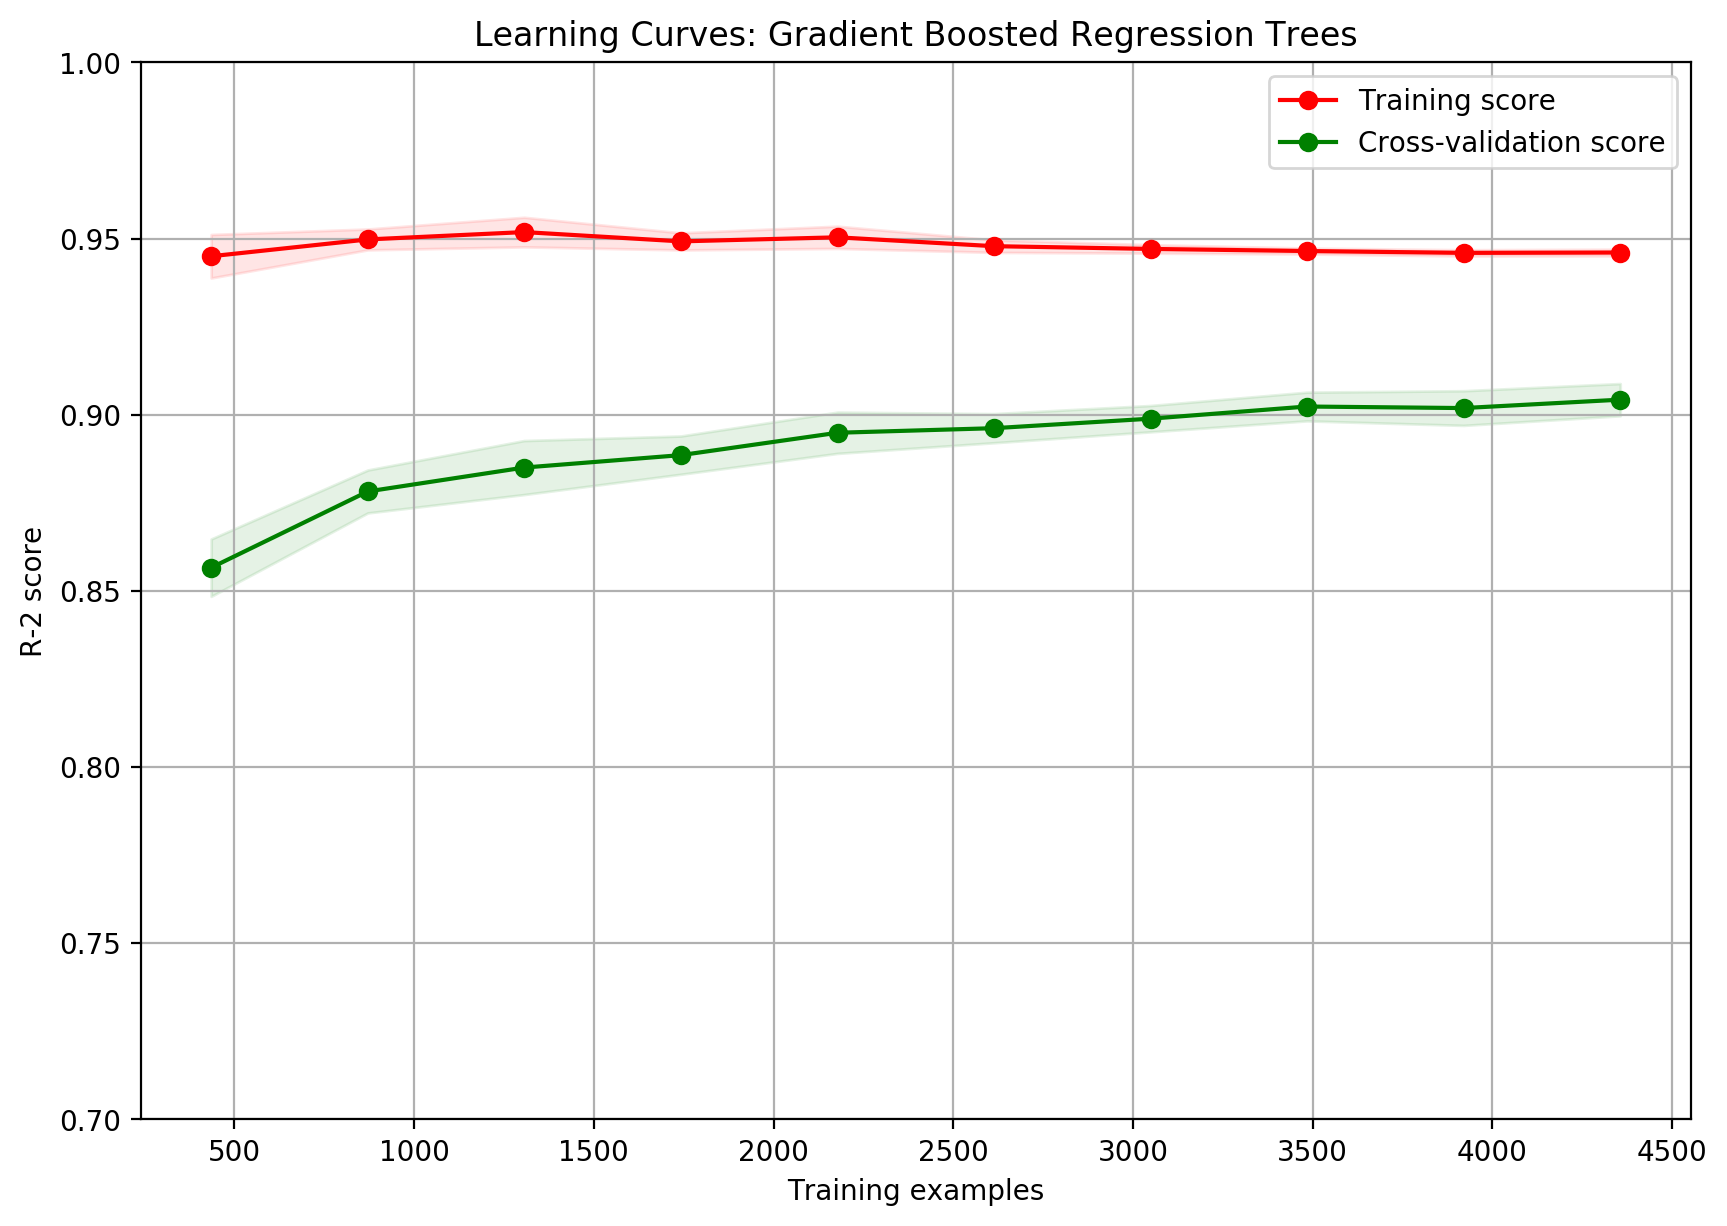

In [85]:
title = "Learning Curves: Gradient Boosted Regression Trees"
plot_learning_curve(model, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()

In [94]:
# list 20 most important features
print("Feature Importances")
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)
feat_importance[:20]

Feature Importances


TotFlArea           0.246197
Gross Taxes         0.217988
Strata Maint Fee    0.146501
Tot Baths           0.085305
Baths               0.066313
Taxes/TotFlArea     0.054593
Tot BR              0.034133
TotalPrkng          0.029529
# Rms               0.023096
Age                 0.022121
View_Score          0.019809
PicCount            0.011877
Fireplaces          0.011789
GST Incl            0.005042
Title to Land 4     0.004054
District 5          0.002920
District 21         0.001955
District 15         0.001690
District 13         0.001387
District 4          0.001382
dtype: float64

## Let's see if we can decrease overfitting by removing unimportant features

In [101]:
imp_feats = feat_importance[feat_importance >= 0.001].index
X_train_imp = X_train.loc[:, imp_feats]
X_test_imp = X_test.loc[:, imp_feats]

In [145]:
# set n_estimators to default and max_depth to 10
model = GradientBoostingRegressor(n_estimators=500, max_depth=5,
                                  learning_rate=0.05, min_samples_leaf=10,
                                  max_features=best_est.max_features)
model.fit(X_train_imp, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=5,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [146]:
#Let's print the R-squared value for train/test. 
#This explains how much of the variance in the data our model is able to decipher. 
print("Gradient Boosting R-squared for train: ", model.score(X_train_imp, y_train))
print("Gradient Boosting R-squared for test: ", model.score(X_test_imp, y_test))
y_pred = model.predict(X_test_imp)
# RMSE on train data
train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train_imp)))
print("Gradient Boosting RMSE for train: %.6e" % train_RMSE)
# RMSE on test data
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting RMSE for test: %.6e" % test_RMSE)
# test/train RMSE ratio
print("test/train RMSE ratio: %.6e" % (test_RMSE/train_RMSE))

Gradient Boosting R-squared for train:  0.952936179396491
Gradient Boosting R-squared for test:  0.9104730475162697
Gradient Boosting RMSE for train: 2.165379e-01
Gradient Boosting RMSE for test: 3.014218e-01
test/train RMSE ratio: 1.392005e+00


In [147]:
# use default parameters on short feature list
model = GradientBoostingRegressor()
model.fit(X_train_imp, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
#Let's print the R-squared value for train/test. 
#This explains how much of the variance in the data our model is able to decipher. 
print("Gradient Boosting R-squared for train: ", model.score(X_train_imp, y_train))
print("Gradient Boosting R-squared for test: ", model.score(X_test_imp, y_test))
y_pred = model.predict(X_test_imp)
# RMSE on train data
train_RMSE = np.sqrt(mean_squared_error(y_train, model.predict(X_train_imp)))
print("Gradient Boosting RMSE for train: %.6e" % train_RMSE)
# RMSE on test data
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Gradient Boosting RMSE for test: %.6e" % test_RMSE)
# test/train RMSE ratio
print("test/train RMSE ratio: %.6e" % (test_RMSE/train_RMSE))

Gradient Boosting R-squared for train:  0.9205234619721506
Gradient Boosting R-squared for test:  0.9070267180963593
Gradient Boosting RMSE for train: 2.813908e-01
Gradient Boosting RMSE for test: 3.071687e-01
test/train RMSE ratio: 1.091609e+00


## Really no improvement likely due to the limitation of features used